<a href="https://colab.research.google.com/github/HemantMishra2003/Important-ML-Concept/blob/main/missing__indicator_random_simple__imputation_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
#  1.random impuation
#  in this notebook we will learn ...special technique
#  could even   apply imputation on  numerical as well as categotrical
#  too by "random value imputation"


## 2.technique : missing indicator

## 3.auomatic selection of parameter


# 1. Random imputation
#  suppose we have column and there is missing values too much in mid
# to fill missing value  we use by random numbers
# it means the data wich which number is there we select random
# and fill ...it could be apply in category as well as numerical too
# very simple technique

# Cons : cant apply in sklean but only could do at pandas ......
# when we do filling missing by  random  then distribution does not change
# much niether variance changes ..

# distribution in for linear and logistic is same but
# not for random forest
# covariance disturbed

# memory heavy for deployment , as we ned to store the orginal training set
# To extract values from and replace the NA in coming observation


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [103]:
v = pd.read_csv('/content/train (2).csv' , usecols = ['Age'  , 'Fare' , 'Survived'])

In [104]:
v.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [105]:
x = v.drop(columns = ['Survived'])
y = v['Survived']

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [107]:
# "Create a new column in x_train named 'Age_imputed', and assign it the same
#  values  as the 'Age' column."
x_train['Age_imputed'] = x_train['Age']

x_test['Age_imputed'] = x_test['Age']

#  3. For better transparency and debugging
#  By keeping both columns (Age and Age_imputed), you can:

#  Compare original and filled values

# Visualize what changed

# Easily go back to raw values if needed

In [108]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [109]:
x_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [110]:
x_train.loc[x_train['Age_imputed'].isnull(), 'Age_imputed'] = \
    x_train['Age'].dropna().sample(
        x_train['Age_imputed'].isnull().sum(), replace=True
    ).values

# This line is used to fill all
# missing values in the Age column of your training dataset
# by using random values from the existing non-missing Age data.
# Here's what happens step by step:






  ## x_train['Age_imputed'].isnull()	:::
  # Find missing values (NaNs) in Age_imputed

  ## .sum()
  # Count how many NaNs are there

  ## x_train['Age'].dropna()
  #	Get all non-missing values from Age

  ## .sample(..., replace=True)
  #Randomly select the same number of values
  # (allowing repetition)

  ## .values
  #  Convert sampled result to NumPy array (for assignment)

  # x_train.loc[rows, 'Age_imputed'] =
  #  values	Assign sampled values to missing positions safely

In [111]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

## It generates the values you want to fill in

# Without it, the = will not know what to assign

# It keeps the imputation random and realistic

array([48.  , 39.  , 27.  , 47.  , 16.  , 11.  , 22.  , 29.  , 34.  ,
       33.  , 70.5 , 22.  , 36.  , 54.  , 31.  , 33.  , 24.  , 42.  ,
       21.  , 28.  , 41.  , 13.  , 40.  , 30.  , 47.  , 33.  , 32.5 ,
       31.  , 23.  , 27.  , 29.  , 20.  , 19.  , 39.  , 21.  , 32.  ,
       35.  , 39.  , 19.  , 15.  , 29.  , 36.  , 45.  , 66.  , 29.  ,
       62.  , 41.  ,  1.  , 18.  ,  2.  , 28.5 , 35.  , 31.  , 20.  ,
       58.  , 28.  , 27.  , 22.  , 22.  , 28.  , 16.  , 11.  , 49.  ,
       29.  ,  4.  , 25.  ,  0.75,  9.  , 54.  , 34.  , 60.  , 24.  ,
       37.  , 58.  , 16.  , 31.  , 15.  , 18.  , 49.  , 45.  , 31.  ,
       52.  , 33.  , 40.  , 32.  , 21.  , 42.  , 26.  , 20.  , 71.  ,
       19.  , 17.  , 38.  , 20.  ,  8.  , 36.  , 27.  , 17.  , 54.  ,
       35.  , 23.  , 24.  , 40.5 , 27.  , 21.  , 28.  ,  2.  , 33.  ,
        0.42, 50.  , 24.  , 28.  , 47.  , 31.  , 52.  , 16.  , 35.  ,
       23.  , 14.5 , 40.  , 34.  , 22.  , 40.  , 33.  , 52.  ,  9.  ,
       13.  , 20.  ,

In [112]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,40.0
493,71.0,49.5042,71.0
527,NaN,221.7792,5.0


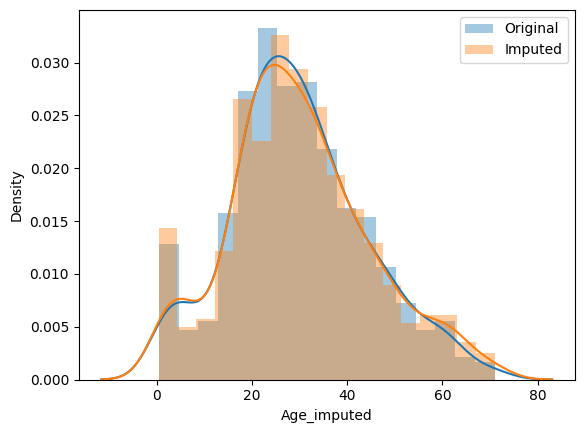

In [113]:
sns.distplot(x_train['Age'],label ='Original')
sns.distplot(x_train['Age_imputed'],label = 'Imputed')
plt.legend()
plt.show()

##  x_train['Age']
# This is the original Age column,
# which may still contain missing (NaN) values.


##  x_train['Age_imputed']
# This is the column where the missing values have been filled
# using random sampling from the existing (non-missing) Age values.

## almost same distribution

In [114]:
print('original variable variance:' , x_train['Age'].var())
print('variance after random  imputation:' , x_train['Age_imputed'].var())

#  variance too not much changed

original variable variance: 204.3495133904614
variance after random  imputation: 221.35424306958174


In [115]:
x_train[['Fare' , 'Age' , 'Age_imputed']].cov()
# covariance is quite changed unlike variance


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,40.179786
Age,71.512440,204.349513,204.349513
Age_imputed,40.179786,204.349513,221.354243


<Axes: >

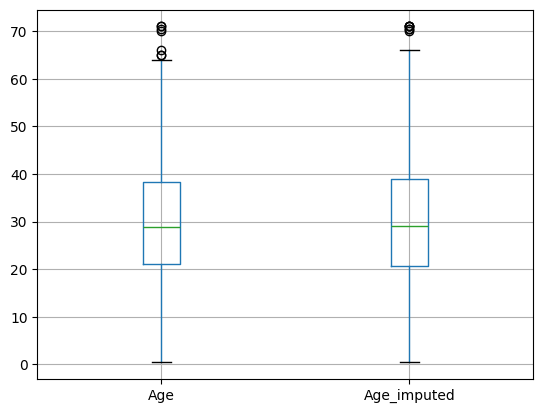

In [116]:
x_train[['Age' , 'Age_imputed']].boxplot()

## outliers are not effected ....even after filling by random numbers


In [117]:
observation = x_train.iloc[0]   # first row
sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

##  in production technique ... if we are giving fare value as input
# then we should get fare output for same input
# but if are giving input aagain if fare same value then
# output gerts changes and keep giving others age value as output
 # to stablise it we use upper codes ...basicaly this happens in production

##**categorical_data _random_sample_imputation**